In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[31]:


import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import math
import os
from collections import defaultdict
from matplotlib.patches import Rectangle
from matplotlib.patches import Rectangle
import numpy as np
import pylab as P
import random


# In[242]:


def compute_exp(path):
    regex = re.compile(r"\d+:(\d+):\s+(\d+\.\d+):(\d+\.\d+)")
    obs_lst = []
    ref_lst = []


    with open(os.path.join(path, 'monte_carlo_sampling_obs.txt')) as f:
        for line in f:
            line = line.rstrip('\n')
            #print(line)
            r = re.search(regex, line)
            #print(r)
            if r is not None:
                obs_lst.append(float(r.group(3)))
            else:
                print(line)
    with open(os.path.join(path, 'monte_carlo_sampling_ref.txt')) as f:
        for line in f:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                ref_lst.append(float(r.group(3)))
            else:
                print(line)
    #print(random_count_lst_dct)

    return np.asarray(obs_lst), np.asarray(ref_lst)


# In[176]:


def plot_box_plt(yobs, yref, fig_name):
    d_lst = list(np.arange(0.1,0.51,0.01))
    eps = 0.05 #controls amount of jitter
    xobs = [random.uniform(1-eps,1+eps) for i in range(0,yobs.shape[0])]
    xref = [random.uniform(2-eps,2+eps) for i in range(0,yref.shape[0])]
    box_data = [yobs, yref]
    
    plt.plot(xobs, yobs, 'ro', label=r'$\mathcal{R}_{obs}$')
    plt.plot(xref, yref, 'bo', label=r'$\mathcal{R}_{ref}$')
    xnames = [r'$\mathcal{R}_{obs}$', r'$\mathcal{R}_{ref}$']
    plt.boxplot(box_data,labels=xnames,sym="") #dont show outliers
    from matplotlib import rcParams
    labelsize = 24
    rcParams['xtick.labelsize'] = labelsize
    #plt.yticks([])
    plt.yticks(np.arange(0.1, 0.4, 0.05))
    plt.yticks([])
    plt.legend(loc='center left', shadow=True, facecolor='white', framealpha=1, prop={'size': 16})
    plt.savefig(fig_name, bbox_inches='tight', dpi =800, pad_inches=0)
    plt.show() # render pipeline
    plt.close()


# In[150]:


yobs, yref = compute_exp('../legacy/sgan/monte_carlo_sampling_10m_celebahq/monte_carlo_sampling')
print(yobs)
plot_box_plt(yobs, yref, 'boxplot_SGAN_CelebAHQ_1024.pdf')


# In[177]:


yobs, yref = compute_exp('../legacy/sgan/monte_carlo_sampling_10m_ffhq/monte_carlo_sampling')
print(yobs)
yref = list(yref)
yref.remove(max(yref))
yref.remove(max(yref))
plot_box_plt(yobs, np.asarray(yref), 'boxplot_SGAN_FFHQ_1024.pdf')


# In[152]:


yobs, yref = compute_exp('../legacy/pggan/monte_carlo_sampling_10m_ffhq/monte_carlo_sampling')
print(yobs)
plot_box_plt(yobs, yref, 'boxplot_PGGAN_FFHQ_1024.pdf')


# In[154]:


yobs, yref = compute_exp('../legacy/pggan/monte_carlo_sampling_10m_celebahq/monte_carlo_sampling')
print(yobs)
plot_box_plt(yobs, yref, 'boxplot_PGGAN_CelebAHQ_1024.pdf')


# In[ ]:


import random


# In[169]:


yobs, yref = compute_exp('../legacy/sgan/monte_carlo_sampling_1m_finetune/monte_carlo_sampling')

plot_box_plt(yobs[random.sample(range(50), 8)], yref, 'boxplot_SGAN_Finetune_128.pdf')


# In[173]:


yobs, yref = compute_exp('../legacy/sgan/monte_carlo_sampling_1m_randomness/monte_carlo_sampling')

plot_box_plt(yobs[random.sample(range(100), 5)], yref, 'boxplot_SGAN_Randomness_128.pdf')


# In[159]:


yobs, yref = compute_exp('../legacy/sgan/monte_carlo_sampling_1m_sgan_architecture/monte_carlo_sampling')
print(yobs)
plot_box_plt(yobs[random.sample(range(100), 4)], yref, 'boxplot_SGAN_Architecture_128.pdf')


# In[ ]:


yobs, yref = compute_exp('../legacy/sgan/monte_carlo_sampling_1m_pggan_architecture/monte_carlo_sampling')
print(yobs)
yref = list(yref)
yref.remove(max(yref))

plot_box_plt(yobs[random.sample(range(100), 4)], np.asarray(yref), 'boxplot_PGGAN_Architecture_128.pdf')

In [74]:
plt.style.use([ '/Users/wuzhenyu/.matplotlib/stylelib/science.mplstyle' , '/Users/wuzhenyu/.matplotlib/stylelib/ieee.mplstyle' ])

def plot_2box_plt(yobs1, yref1, yobs2, yref2, fig_name):
    d_lst = list(np.arange(0.1,0.51,0.01))
    eps = 0.05 #controls amount of jitter
    xobs1 = [random.uniform(-0.4-eps,-0.4+eps) for i in range(0,yobs1.shape[0])]
    xref1 = [random.uniform(0.4-eps,0.4+eps) for i in range(0,yref1.shape[0])]
    box_data1 = [yobs1, yobs2]
    
    xobs2 = [random.uniform(1.6-eps,1.6+eps) for i in range(0,yobs2.shape[0])]
    xref2 = [random.uniform(2.4-eps,2.4+eps) for i in range(0,yref2.shape[0])]
    box_data2 = [yref1, yref2]
    
    plt.plot(xobs1, yobs1, 'ro', label=r'$\mathcal{I}_w$')
    plt.plot(xref1, yref1, 'bo', label=r'$\mathcal{I}_r$')
    
    plt.plot(xobs2, yobs2, 'ro')
    plt.plot(xref2, yref2, 'bo')
    
    xnames = ['Before', 'After']
    #plt.boxplot(box_data1,positions = [-0.4, 1.6],labels=xnames,sym="", widths=0.6)
    #plt.boxplot(box_data2,positions = [0.4, 2.4],labels=xnames,sym="", widths=0.6)
    plt.boxplot(box_data1,positions = [-0.4, 1.6],sym="", widths=0.6)
    plt.boxplot(box_data2,positions = [0.4, 2.4],sym="", widths=0.6)
    
    plt.xticks(range(0, len(xnames) * 2, 2), xnames)
    plt.xlim(-2, len(xnames)*2)
    #plt.ylim(0, 8)
    plt.tight_layout()
    from matplotlib import rcParams
    labelsize = 10
    rcParams['xtick.labelsize'] = labelsize
    plt.yticks(np.arange(0.35, 0.7, 0.05))
    #plt.yticks([])
    leg=plt.legend(loc='center left', shadow=False, facecolor='white', framealpha=1, frameon=True, prop={'size': 10})
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(0.5)
    plt.savefig(fig_name, bbox_inches='tight', dpi =800, pad_inches=0)
    plt.show() # render pipeline
    plt.close()


# In[260]:

[0.35492059 0.36894921 0.35039883 0.36777469 0.35952363 0.3703543
 0.36231463 0.37503423 0.36591702 0.37388427 0.3623397  0.36261543
 0.36101293 0.36668428 0.37593149 0.37226328 0.37513504 0.36539117
 0.37324336 0.37069183 0.37390122 0.37797074 0.36439082 0.36696668
 0.37264764 0.35208227 0.36971062 0.3706844  0.37661918 0.37400288
 0.36010157 0.36542108 0.36566374 0.37173493 0.37342225 0.37121248
 0.37129013 0.3744467  0.36671066 0.36435283 0.36503107 0.36353738
 0.36435788 0.36915849 0.37780632 0.37723739 0.36932148 0.3579416
 0.37146677 0.3701913  0.36911207 0.35832813 0.37207539 0.36376594
 0.37722325 0.395544   0.38520713 0.37767876 0.37089925 0.39733365
 0.36379666 0.38268293 0.38288182 0.37438761 0.38083777 0.374022
 0.38450957 0.366466   0.37361888 0.37357081 0.37605485 0.38317102
 0.3701585  0.37789945 0.37705399 0.3794625  0.36937471 0.38407381
 0.38429844 0.36818425 0.37282509 0.37595536 0.38365563 0.38029828
 0.37443514 0.38512237 0.38251015 0.37617771 0.37176946 0.38326934

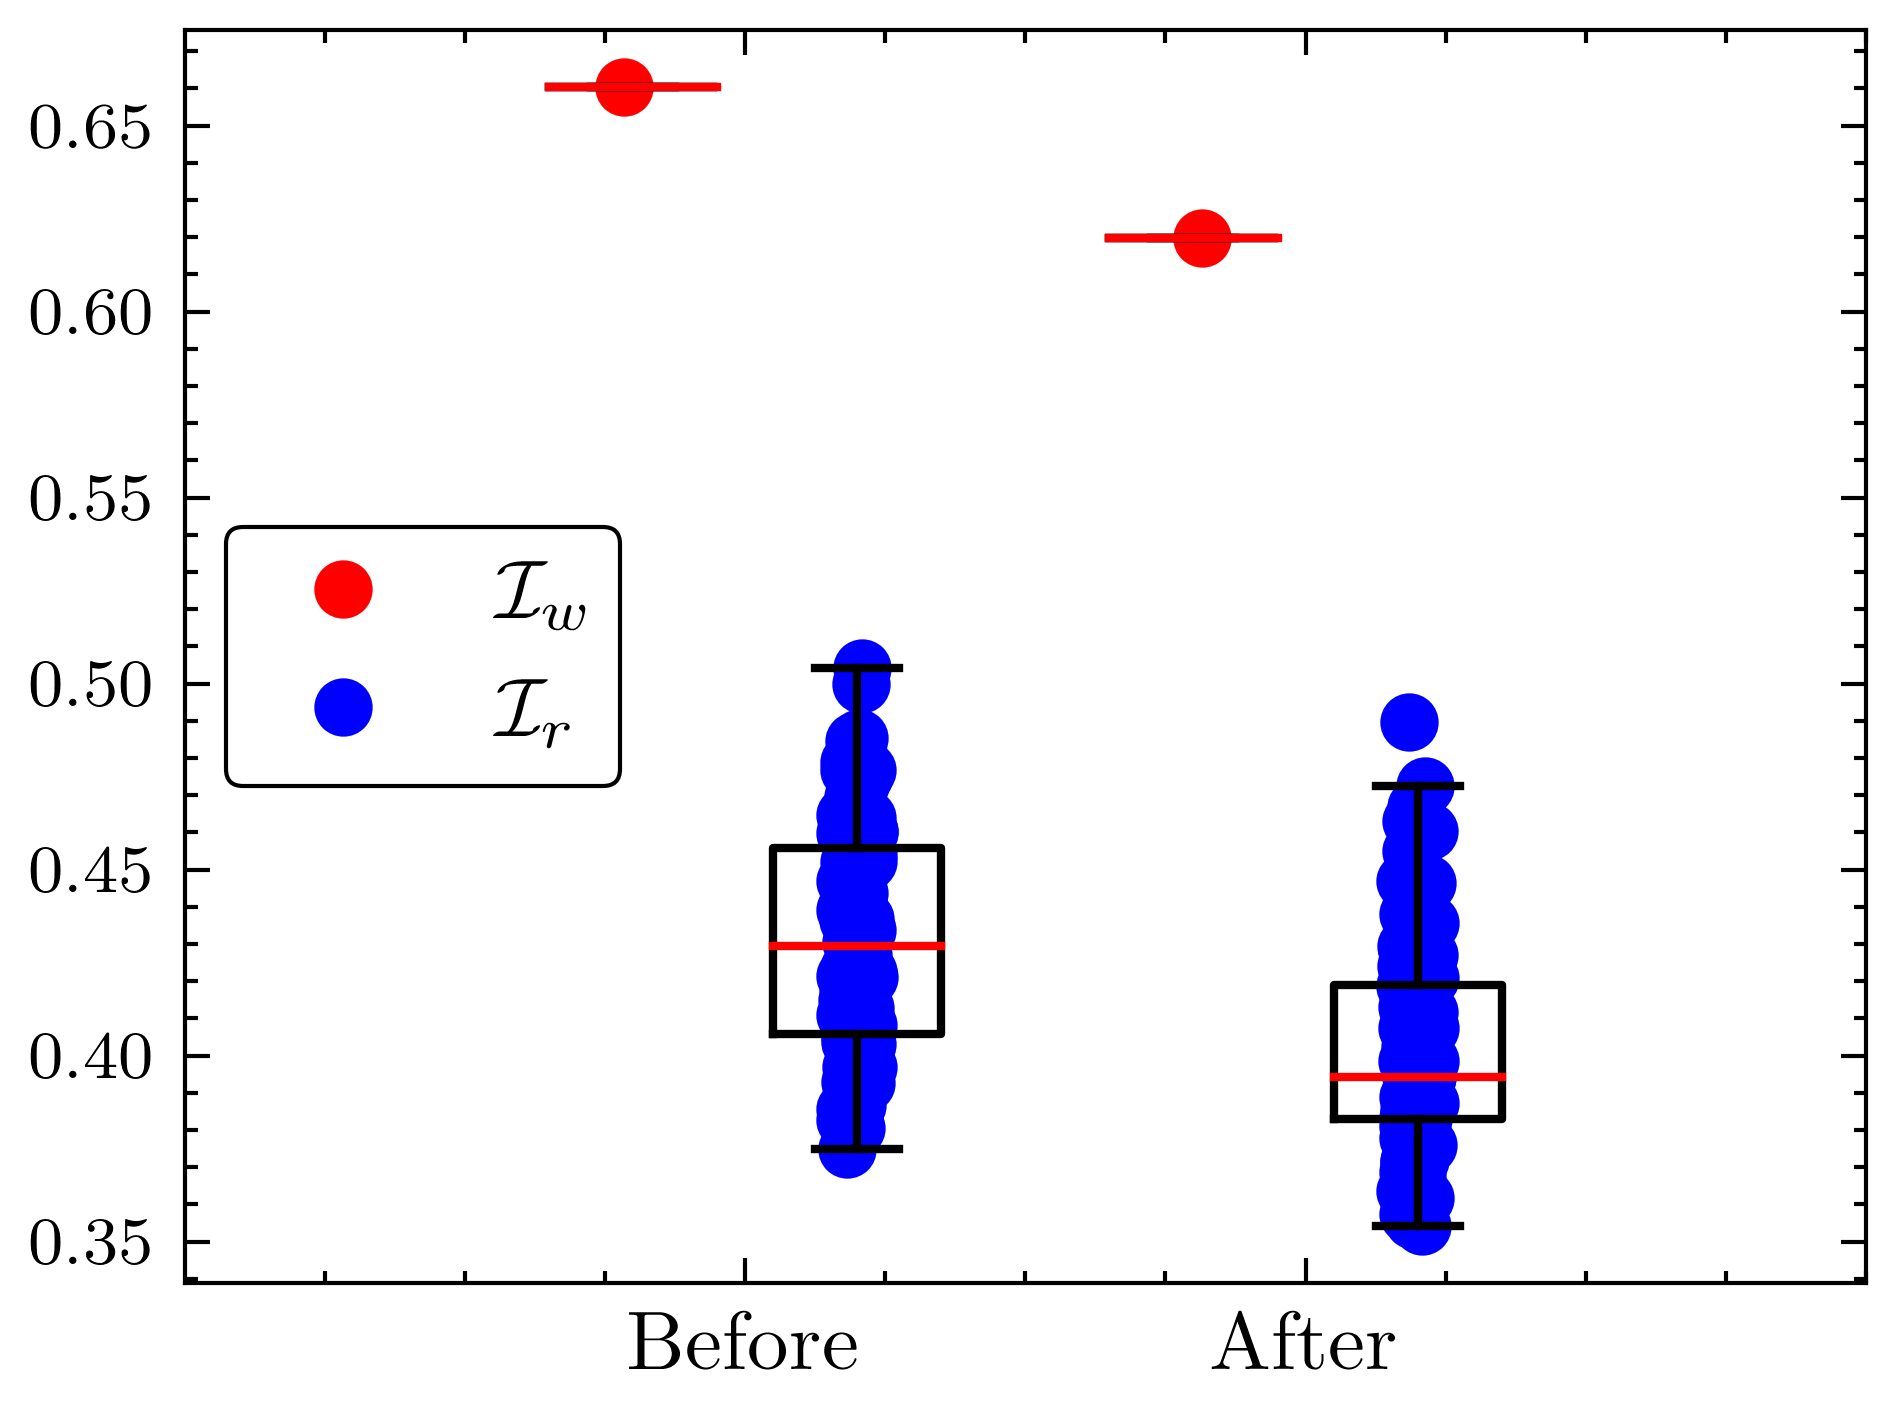

In [73]:
yobs1, yref1 = compute_exp('../legacy/pggan/monte_carlo_sampling_10m_celebahq/monte_carlo_sampling')
yobs2, yref2 = compute_exp('../legacy/pggan/monte_carlo_sampling_10m_ffhq/monte_carlo_sampling')
print(yobs)
plot_2box_plt(np.asarray([np.min(yobs2)+0.31]), yref2+0.215, np.asarray([np.max(yobs1)+0.28]), yref1+0.2, 'boxplot_GMM_reshaping.pdf')

In [76]:
print(yref1.shape)

(100,)


[0.35492059 0.36894921 0.35039883 0.36777469 0.35952363 0.3703543
 0.36231463 0.37503423 0.36591702 0.37388427 0.3623397  0.36261543
 0.36101293 0.36668428 0.37593149 0.37226328 0.37513504 0.36539117
 0.37324336 0.37069183 0.37390122 0.37797074 0.36439082 0.36696668
 0.37264764 0.35208227 0.36971062 0.3706844  0.37661918 0.37400288
 0.36010157 0.36542108 0.36566374 0.37173493 0.37342225 0.37121248
 0.37129013 0.3744467  0.36671066 0.36435283 0.36503107 0.36353738
 0.36435788 0.36915849 0.37780632 0.37723739 0.36932148 0.3579416
 0.37146677 0.3701913  0.36911207 0.35832813 0.37207539 0.36376594
 0.37722325 0.395544   0.38520713 0.37767876 0.37089925 0.39733365
 0.36379666 0.38268293 0.38288182 0.37438761 0.38083777 0.374022
 0.38450957 0.366466   0.37361888 0.37357081 0.37605485 0.38317102
 0.3701585  0.37789945 0.37705399 0.3794625  0.36937471 0.38407381
 0.38429844 0.36818425 0.37282509 0.37595536 0.38365563 0.38029828
 0.37443514 0.38512237 0.38251015 0.37617771 0.37176946 0.38326934

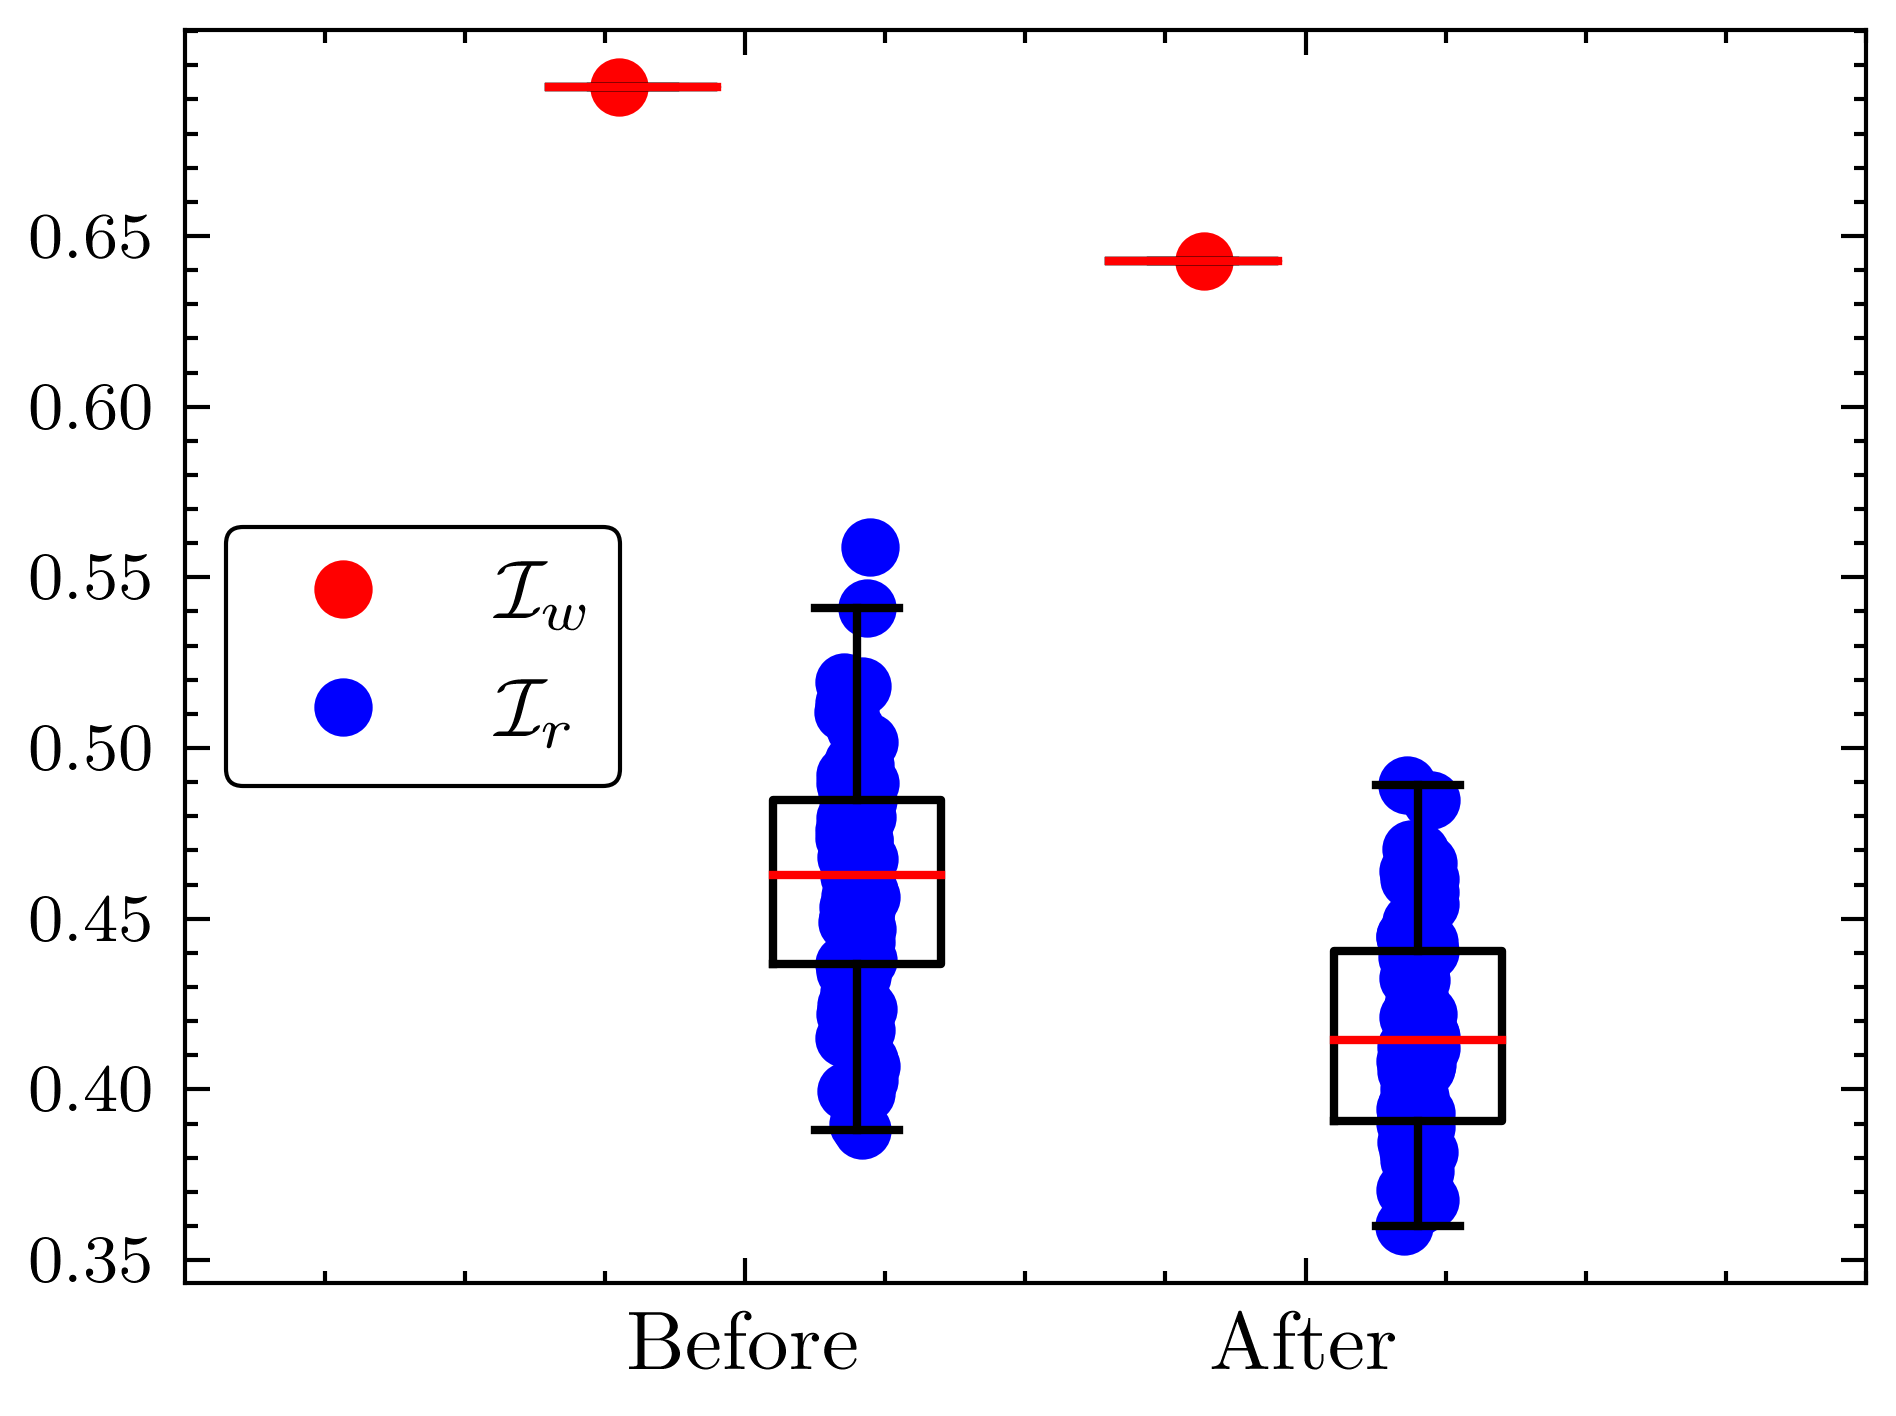

In [75]:
yobs1, yref1 = compute_exp('../legacy/pggan/monte_carlo_sampling_10m_ffhq/monte_carlo_sampling')
yobs2, yref2 = compute_exp('../legacy/pggan/monte_carlo_sampling_10m_ffhq/monte_carlo_sampling_old')
print(yobs)
plot_2box_plt(np.asarray([np.min(yobs2)+0.31]), yref2+0.24, np.asarray([np.mean(yobs1)+0.27]), yref1+0.2, 'boxplot_IS_reshaping.pdf')